# 데이터 불러오기

In [4]:
import pandas as pd 
age_gender = pd.read_csv('/content/age_gender_info.csv')
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample = pd.read_csv('/content/sample_submission.csv')

In [5]:
train_data_count = len(train)
test_data_count = len(test)

print(train_data_count, test_data_count)

2952 1022


# 데이터 합치기

In [6]:
print(len(train), len(test))
test['등록차량수'] = -1
train = train.append(test)
print(len(train))

2952 1022
3974


In [7]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           749
임대료                             749
도보 10분거리 내 지하철역 수(환승노선 수 반영)    253
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [8]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

# 데이터 전처리

## 컬럼 삭제

임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수는 버린다.

도보 10분거리 내 버스정류장 수는 0으로 채움

In [9]:
train.drop(columns = ['임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)'], inplace = True)
test.drop(columns = ['임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)'], inplace = True)

## 자격유형 결측치 처리

### 자격유형의 null값은 가장 많은 A로 채움

In [10]:
train.자격유형.value_counts()

A    2373
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

In [11]:
train['자격유형'].fillna('A', inplace = True)
test['자격유형'].fillna('A', inplace = True)

In [12]:
train['자격유형'].value_counts()

A    2375
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

In [13]:
train.isnull().sum()

단지코드                  0
총세대수                  0
임대건물구분                0
지역                    0
공급유형                  0
전용면적                  0
전용면적별세대수              0
공가수                   0
자격유형                  0
도보 10분거리 내 버스정류장 수    4
단지내주차면수               0
등록차량수                 0
dtype: int64

## 도보 10분거리 내 버스정류장 수 결측치 처리

In [14]:
train['도보 10분거리 내 버스정류장 수'].fillna(0, inplace = True)

In [15]:
print(train.isnull().sum())

단지코드                  0
총세대수                  0
임대건물구분                0
지역                    0
공급유형                  0
전용면적                  0
전용면적별세대수              0
공가수                   0
자격유형                  0
도보 10분거리 내 버스정류장 수    0
단지내주차면수               0
등록차량수                 0
dtype: int64


# 로그처리

총세대수


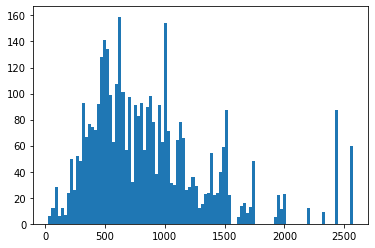

전용면적


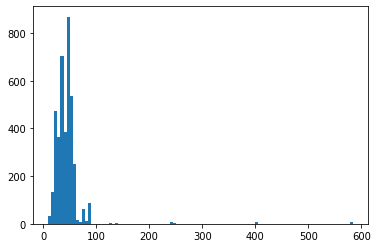

전용면적별세대수


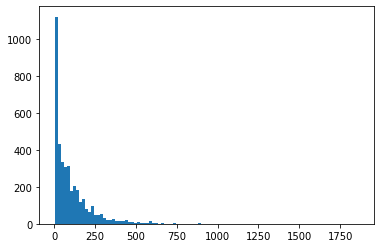

공가수


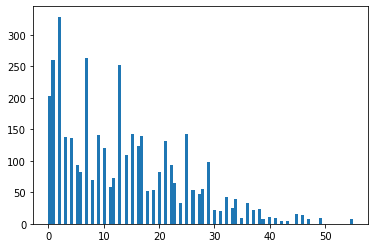

도보 10분거리 내 버스정류장 수


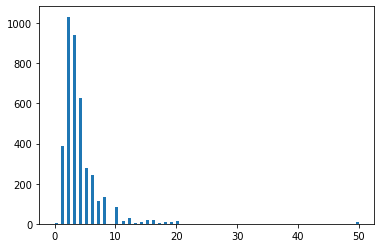

단지내주차면수


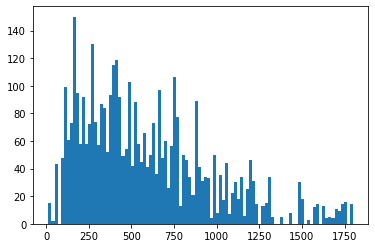

등록차량수


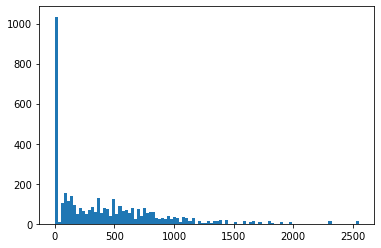

In [16]:
import matplotlib.pyplot as plt

value_columns = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']
for column_name in value_columns:
    print(column_name)
    plt.hist(train[column_name], bins=100)
    plt.show()

In [17]:
max_values = {
    '전용면적':100,
    '공가수':40,
    '도보 10분거리 내 버스정류장 수':10,
}

전용면적별세대수


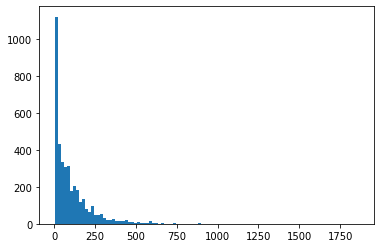

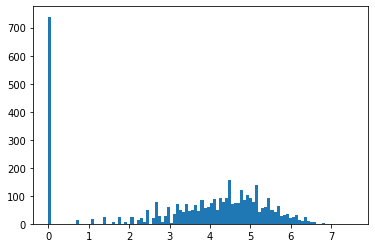

In [18]:
to_be_removed_columns = []
import numpy as np
log_columns = ['전용면적별세대수']

for column_name in log_columns:
    print(column_name)
    plt.hist(train[column_name], bins=100)
    plt.show()    
    train['log_'+column_name] = np.log(train[column_name])
    plt.hist(train['log_'+column_name], bins=100)
    plt.show()    

to_be_removed_columns.extend(log_columns) 

# 카테고리성 데이터 처리

In [19]:
category_columns = ['단지코드', '임대건물구분','지역','공급유형', '자격유형']

In [20]:
to_be_removed_columns = []

for column_name in category_columns:
  train[column_name] = train[column_name].astype('category')
  train[column_name+'_code'] = train[column_name].cat.codes

  test[column_name] = test[column_name].astype('category')
  test[column_name+'_code'] = test[column_name].cat.codes

train.info()
to_be_removed_columns.extend(category_columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   단지코드                3974 non-null   category
 1   총세대수                3974 non-null   int64   
 2   임대건물구분              3974 non-null   category
 3   지역                  3974 non-null   category
 4   공급유형                3974 non-null   category
 5   전용면적                3974 non-null   float64 
 6   전용면적별세대수            3974 non-null   int64   
 7   공가수                 3974 non-null   float64 
 8   자격유형                3974 non-null   category
 9   도보 10분거리 내 버스정류장 수  3974 non-null   float64 
 10  단지내주차면수             3974 non-null   float64 
 11  등록차량수               3974 non-null   float64 
 12  log_전용면적별세대수        3974 non-null   float64 
 13  단지코드_code           3974 non-null   int16   
 14  임대건물구분_code         3974 non-null   int8    
 15  지역_code             3974 non-null   in

In [21]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   단지코드                3974 non-null   category
 1   총세대수                3974 non-null   int64   
 2   임대건물구분              3974 non-null   category
 3   지역                  3974 non-null   category
 4   공급유형                3974 non-null   category
 5   전용면적                3974 non-null   float64 
 6   전용면적별세대수            3974 non-null   int64   
 7   공가수                 3974 non-null   float64 
 8   자격유형                3974 non-null   category
 9   도보 10분거리 내 버스정류장 수  3974 non-null   float64 
 10  단지내주차면수             3974 non-null   float64 
 11  등록차량수               3974 non-null   float64 
 12  log_전용면적별세대수        3974 non-null   float64 
 13  단지코드_code           3974 non-null   int16   
 14  임대건물구분_code         3974 non-null   int8    
 15  지역_code             3974 non-null   in

## 카테고리 컬럼을 one-hot-encoding

In [22]:
category_name = '단지코드'
column_name = column_name+'_code'
train = pd.get_dummies(train, columns= [column_name])

In [23]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   단지코드                3974 non-null   category
 1   총세대수                3974 non-null   int64   
 2   임대건물구분              3974 non-null   category
 3   지역                  3974 non-null   category
 4   공급유형                3974 non-null   category
 5   전용면적                3974 non-null   float64 
 6   전용면적별세대수            3974 non-null   int64   
 7   공가수                 3974 non-null   float64 
 8   자격유형                3974 non-null   category
 9   도보 10분거리 내 버스정류장 수  3974 non-null   float64 
 10  단지내주차면수             3974 non-null   float64 
 11  등록차량수               3974 non-null   float64 
 12  log_전용면적별세대수        3974 non-null   float64 
 13  단지코드_code           3974 non-null   int16   
 14  임대건물구분_code         3974 non-null   int8    
 15  지역_code             3974 non-null   in

# 불필요한 컬럼 삭제

In [24]:
train.drop(columns=to_be_removed_columns, inplace=True)

In [25]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   총세대수                3974 non-null   int64  
 1   전용면적                3974 non-null   float64
 2   전용면적별세대수            3974 non-null   int64  
 3   공가수                 3974 non-null   float64
 4   도보 10분거리 내 버스정류장 수  3974 non-null   float64
 5   단지내주차면수             3974 non-null   float64
 6   등록차량수               3974 non-null   float64
 7   log_전용면적별세대수        3974 non-null   float64
 8   단지코드_code           3974 non-null   int16  
 9   임대건물구분_code         3974 non-null   int8   
 10  지역_code             3974 non-null   int8   
 11  공급유형_code           3974 non-null   int8   
 12  자격유형_code_0         3974 non-null   uint8  
 13  자격유형_code_1         3974 non-null   uint8  
 14  자격유형_code_2         3974 non-null   uint8  
 15  자격유형_code_3         3974 non-null   uint8  
 16  자격유형_c

# Normalization

In [26]:
y_df = train['등록차량수']
x_df = train.drop(columns=['등록차량수'])

In [27]:
x_df = (x_df - x_df.min()) / (x_df.max() - x_df.min())

In [28]:
print(len(y_df))
print(y_df.value_counts())

3974
-1.0      1022
 359.0      61
 172.0      48
 62.0       44
 116.0      40
          ... 
 149.0       2
 873.0       2
 73.0        2
 16.0        1
 386.0       1
Name: 등록차량수, Length: 355, dtype: int64


In [29]:
y_df = (y_df - y_df.min()) / (y_df.max() - y_df.min())

# train, test 분리

In [30]:
import numpy as np
x = x_df.to_numpy()
y = y_df.to_numpy()

print(x.shape)
print(y.shape)

(3974, 26)
(3974,)


# train / test 분리

In [31]:

train_x, test_x = x[:train_data_count], x[:test_data_count]
train_y, test_y = y[:train_data_count], y[:test_data_count]

# 모델 학습

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                270       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
11/11 [==============================] - 0s 17ms/step - loss: 0.2442 - mae: 0.4488 - val_loss: 0.1116 - val_mae: 0.2946
Epoch 2/2000
11/11 [==============================] - 0s 4ms/step - loss: 0.0598 - mae: 0.1894 - val_loss: 0.0461 - val_mae: 0.1794
Epoch 3/2000
11/11 [==============================] - 0

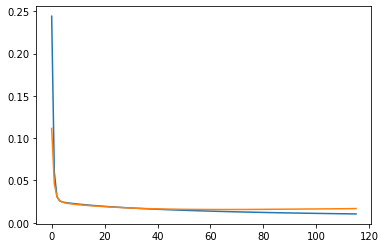

32/32 [==============================] - 0s 2ms/step - loss: 0.0069 - mae: 0.0651
mae = 0.06511235237121582
loss= 0.006931604817509651


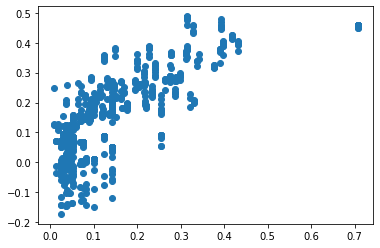

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상
    verbose=1,
    patience=50)         # 중지까지의 여유분

history = model.fit(train_x, train_y, epochs=2000, verbose=1, batch_size=256, validation_split=0.1,
                    callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print('mae =', mae)
print("loss=", loss)


y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [53]:
!head sample_submission.csv

code,num
C1072,0
C1128,0
C1456,0
C1840,0
C1332,0
C1563,0
C1794,0
C1640,0
C1377,0


In [54]:
!head test.csv

단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.9,112,14.0,H,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.9,120,14.0,H,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.71,51,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.96,198,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.96,67,14.0,H,43497000,296780,0.0,2.0,683.0
C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0


In [55]:
!wc sample_submission.csv
!wc test.csv

 151  151 1360 sample_submission.csv
 1023  1033 92574 test.csv


# 예측값 구하기

In [56]:
y_min = y_df.min()
y_max = y_df.max()
y_ = model.predict(test_x)
recovered_y = y_ * (y_max - y_min) + y_min

In [57]:
test['등록차량수'] = recovered_y

In [58]:
result_df= test.groupby('단지코드').mean()

In [59]:
result_df = result_df.reset_index()

In [60]:
result_df = result_df[['단지코드', '등록차량수']]

In [61]:
result = result_df.to_numpy()
print(result.shape)
print(result[:5])

(150, 2)
[['C1003' 0.30952176451683044]
 ['C1006' 0.13354124128818512]
 ['C1016' 0.15922626852989197]
 ['C1019' 0.17728875577449799]
 ['C1030' 0.42134881019592285]]


In [62]:
result_map = {}
for code, value in result:
    result_map[code] = value

print(result_map)

{'C1003': 0.30952176451683044, 'C1006': 0.13354124128818512, 'C1016': 0.15922626852989197, 'C1019': 0.17728875577449799, 'C1030': 0.42134881019592285, 'C1038': 0.26041316986083984, 'C1040': 0.07720454037189484, 'C1060': -0.012836441397666931, 'C1064': 0.17880457639694214, 'C1071': -0.03670758381485939, 'C1072': 0.3916819393634796, 'C1083': -0.03243010863661766, 'C1105': 0.056500181555747986, 'C1128': 0.262701153755188, 'C1135': 0.1353999674320221, 'C1147': 0.012016554363071918, 'C1149': 0.1805289089679718, 'C1152': 0.09038177132606506, 'C1158': 0.05068684741854668, 'C1166': 0.1517225205898285, 'C1189': 0.020029287785291672, 'C1215': -0.00849594920873642, 'C1216': 0.17172060906887054, 'C1225': 0.11967366933822632, 'C1229': 0.22757752239704132, 'C1239': 0.07424595952033997, 'C1250': 0.029462000355124474, 'C1253': 0.15291312336921692, 'C1266': 0.17877306044101715, 'C1267': 0.22502291202545166, 'C1282': 0.22448618710041046, 'C1289': 0.45709699392318726, 'C1294': 0.109913170337677, 'C1297':

In [63]:
sample.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


In [64]:
submission_code = sample.code.to_numpy()

submission = []

for code in submission_code:
    submission.append([code, result_map[code]])

submission = np.array(submission)

submission_df = pd.DataFrame(submission, columns=["code", "num"])

submission_df.head()

,code,num
0,C1072,0.3916819393634796
1,C1128,0.262701153755188
2,C1456,0.4188636839389801
3,C1840,0.23284605145454407
4,C1332,0.2630661129951477


In [65]:
submission_df.to_csv('submission.csv', index =False)